*** MiniProject: Deep Learning for Movie Reviews Sentiment Analysis ***


> 📌 ปัญหา (Problem Statement) : 
Mini Project นี้เกี่ยวกับการวิเคราะห์ความคิดเห็น(Comment) ของผู้ชมว่าชอบ(Positive)หรือไม่ชอบ(Negative)จากรีวิวที่เขียนไว้ ? 
> วัตถุประสงค์ :  
- สร้าง Deep learning เพื่อจําเเนกความรู้สึกขอผู้ชม
- ใช้ Convolutional Neural Network (CNN) ในการประมวลผลข้อความ
- ประเมินประสิทธิภาพของโมเดลด้วย Accuracy และ Loss
> ข้อมูลพื้นฐาน : 
- จํานวนข้อมูล 50,000 รีวิวภาพยนต์ 
    - 25,000 สําหรับ Training Dataset 
    - 25,000 สําหรับ Testing Dataset
- Label:
    - 0 = Negative (ไม่ชอบ)
    - 1 = Positive (ชอบ)
- Dataset มีหร้อมใน keras
- ลักษณะข้อมูลจะเป็นข้อความรีวิวภาษาอังกฤษที่ถูกแปลงเป็นลำดับของตัวเลข

### นําเข้าคลังไลบราลี้ที่ต้องการใช้งาน 

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [24]:
print("TensorFlow version:", tf.__version__)
print("CPU Available:", tf.config.list_physical_devices('CPU'))

TensorFlow version: 2.20.0
CPU Available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### 1.โหลดข้อมูล Dataset จาก Keras

In [ ]:
vocab_size = 10000
max_length = 250 
(x_train, y_train) , (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")
print(f"Example review (as numbers): {x_train[0][:10]}...")  # แสดง 10 ตัวแรก
print(f"Label: {y_train[0]} (0=Negative, 1=Positive)")


Training samples: 25000
Testing samples: 25000
Example review (as numbers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]...
Label: 1 (0=Negative, 1=Positive)


### 2. ขั้นตอนประมวลผลโมเดล

In [ ]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post') # กําหนด Paddding ให้เป็น 250 คําทุกๆ data set training
x_test = pad_sequences(x_test, maxlen=max_length, padding='post') # กําหนด Paddding ให้เป็น 250 คําทุกๆ data set test
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Discribe The first Element  {len(x_test[0])}" )

Training data shape: (25000, 250)
Testing data shape: (25000, 250)
Discribe The first Element 250


### 3. สร้าง CNN Model

In [ ]:
model = models.Sequential([
    # Embedding Layer - แปลงคำ (ตัวเลข) เป็น dense vectors
    layers.Embedding(input_dim=vocab_size, 
                    output_dim=128,           # แต่ละคำเป็น vector 128 มิติ
                    input_length=max_length),
    
    # Dropout เพื่อป้องกัน overfitting
    layers.Dropout(0.3),
    
    # 1D Convolution - หา patterns ในข้อความ
    layers.Conv1D(filters=128, 
                 kernel_size=5,               # มอง 5 คำต่อเนื่องกัน
                 activation='relu'),
    
    # MaxPooling - เลือกส่วนสำคัญสุด
    layers.GlobalMaxPooling1D(),
    
    # Dense Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    # Output Layer - Positive (1) or Negative (0)
    layers.Dense(1, activation='sigmoid')
])
# Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 4. Train Model

In [28]:
print("Training Model...")
# เก็บส่วนหนึ่งของ training data ไว้เป็น validation
history = model.fit(
    x_train, y_train,
    epochs=10,                    # train 10 รอบ
    batch_size=128,               # ประมวลผลครั้งละ 128 samples
    validation_split=0.2,         # เอา 20% ไว้ validation
    verbose=1
)

Training Model...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6607 - loss: 0.5836 - val_accuracy: 0.8324 - val_loss: 0.3807
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.8709 - loss: 0.3101 - val_accuracy: 0.8914 - val_loss: 0.2709
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9299 - loss: 0.1851 - val_accuracy: 0.8940 - val_loss: 0.2811
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9685 - loss: 0.0985 - val_accuracy: 0.8982 - val_loss: 0.2880
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9859 - loss: 0.0516 - val_accuracy: 0.8940 - val_loss: 0.3278
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.9945 - loss: 0.0249 - val_accuracy: 0.8898 - val_loss: 0.3852
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.9969 - loss: 0.0144 - val_accuracy: 0.8910 - val_loss: 0.3958
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9981

### 5. ประเมินผล

In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f" Test Accuracy: {test_accuracy*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

 Test Accuracy: 87.99%
 Test Loss: 0.5189


### 6. บันทึก Model

In [32]:
print("Saving Model")
model.save('imdb_sentiment_cnn.keras')

Saving Model


### 7. Visualize Training History

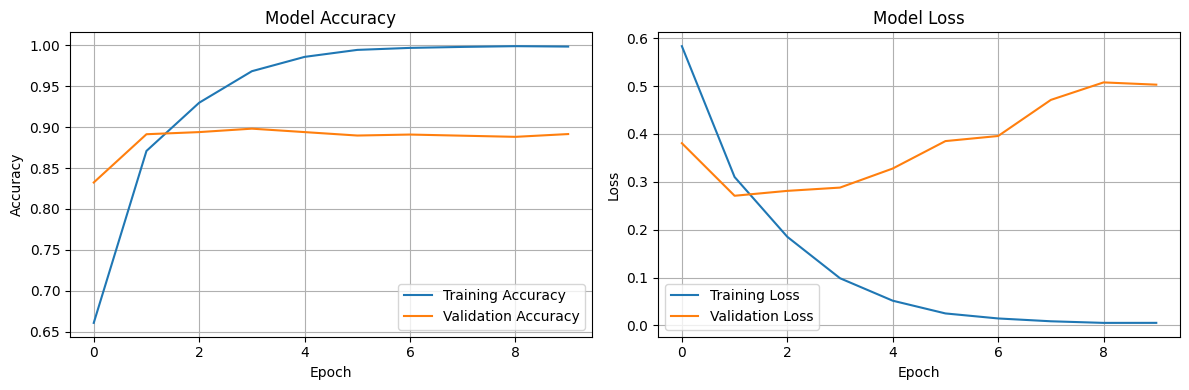

In [33]:
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=150, bbox_inches='tight')
plt.show()